# Pymaceuticals
---

* Of the four treatment drugs that were investigated, only Capomulin showed signs of shrinking tumor volume. Over the course of 45 days, it shrunk by 19% while the mean volume for the tumours under the other three drug treatments grew by 46% to 57%. The metastatic spead during Capomulin treatement was also the slowest growing and the metastatic size was the smallest. The most mice survived to day 45 when treated with Capomulin.


* In terms of how the other three drug treatments performed when looking at tumor response, the mean tumor volume for the first ten days seemed to be growing at a very similar rate for Infubinol, Ketapril and the placebo (i.e. "fake treatment"). However, as the treatement progressed, the tumor size for those mice treated with Infubinol grew at a slower rate than the placebo. It also showed the second slowest growth in metastatic spread after Capomulin. On the other hand, upon investigating survival rate, mice treated with Infubinol had the worst survival rate which could be skewing the tumor volume results. It is also worth noting that the standard error of the mean tumor volume across all drug treatments was the greatest on the last treatment day (i.e. day 45) meaning that the tumor volume results on the last day varied the most across the mice.


* Of all the drugs, Ketapril's performance mirrored that of the placebo the most across all metrics (i.e. tumor volume, metastatic spread and survival). In looking at tumor response, Ketapril actually performed worse for the majority of the treatment period (i.e. the mean tumor volume for mice treated with Ketapril was greater than those who took the placebo drug). The metastatic spread was slighly slower for those mice on Ketapril versus the placebo and its survival rate was better than the placebo during the treatment, except for the final day where it was the same.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Set csv files as Panda dataframes
mouse_drugs = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial = pd.read_csv("data/clinicaltrial_data.csv")

# Combine data into a single dataframe based on Mouse ID
trial_data = pd.merge(clinical_trial, mouse_drugs, how="left", on=["Mouse ID", "Mouse ID"])

In [2]:
# Display a preview of the merged data table
trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [3]:
# Time is the main independent variable for tumor volume, metastatic size and survival rate
time = trial_data["Timepoint"].unique()
# The four drug treatments that are investigated are Capomulin, Infubinol, Ketapril and Placebo ("fake" treatment)
drug_list = ["Capomulin","Infubinol","Ketapril","Placebo"]
# Differentiate the treatments with different colors and markers for the plots
color_list = ["red","blue","green","black"]
marker_list = ["o","^","s","d"]

## Tumor Response to Treatment

In [4]:
# Create the GroupBy object based on Drug and Timepoint and take the average of all columns
mean_tumor_res = trial_data.groupby(["Drug","Timepoint"]).mean()
# Reset the index
mean_tumor_res.reset_index(inplace=True)
# Delete the Metastatic Sites column
del mean_tumor_res["Metastatic Sites"]
# Display the first 5 rows in the dataframe
mean_tumor_res.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Create the GroupBy object based on Drug and Timepoint and retun the unbiased standard error of the mean 
stderr_tumor_res = trial_data.groupby(["Drug","Timepoint"]).sem()
# Reset the index
stderr_tumor_res.reset_index(inplace=True)
# Delete the Metastatic Sites and Mouse ID columns
stderr_tumor_res = stderr_tumor_res.drop(columns= ["Mouse ID", "Metastatic Sites"])
# Display the first 5 rows in the dataframe
stderr_tumor_res.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Create a pivot table dataframe for Tumor Volume with Timepoint as rows and Drugs as columns
drug_tumor_res = mean_tumor_res.pivot_table("Tumor Volume (mm3)","Timepoint","Drug")
# Display the first 5 rows in the dataframe
drug_tumor_res.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


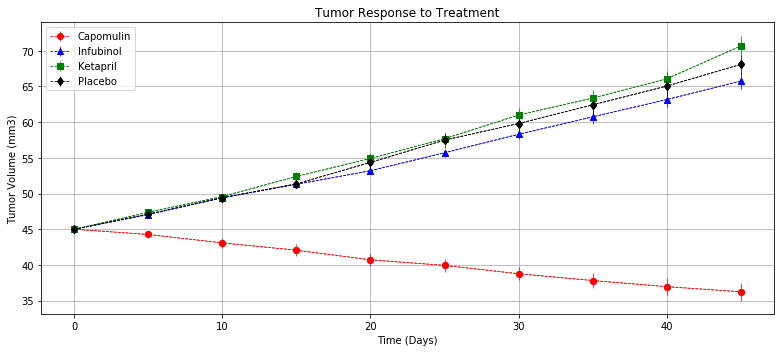

In [7]:
# Set-up the plot and the figure size
fig,ax = plt.subplots(figsize=(11,5))

# Set-up a for-loop with each drug and its specific color and marker 
for drug,c,m in zip(drug_list,color_list,marker_list):
    # Get the mean for each drug
    mean = drug_tumor_res[drug].tolist()
    # Get the standard error associated with each drug
    std_err = stderr_tumor_res.loc[stderr_tumor_res["Drug"] == drug, 'Tumor Volume (mm3)'].tolist()
    # Create the stardard error bars and format them accordingly
    ax.errorbar(time, mean,yerr=std_err, color=c,label=drug,marker=m,ls="--",lw=.75)
    # Create the line plot using time as the x-axis and mean as the y-axis
    ax.plot(time, mean, color=c, marker=m,ls="--",lw=.75)
    # Establish the legend and its location on the plot
    ax.legend(loc="upper left", fancybox=True)

# Title the plot
ax.set_title("Tumor Response to Treatment")
# Label both of the axis accordingly
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
# Add gridlines
ax.grid()

# Use tight_layout to automatically adjust params
plt.tight_layout()
# Save the figure as .png
plt.savefig('tumor_resp.png')
# Display the figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Create the GroupBy object based on Drug and Timepoint and take the average of all columns
mean_metast_res = trial_data.groupby(["Drug","Timepoint"]).mean()
# Delete the Tumor Volume column
del mean_metast_res["Tumor Volume (mm3)"]
# Display the first 5 rows in the dataframe
mean_metast_res.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Create the GroupBy object based on Drug and Timepoint and retun the unbiased standard error of the mean 
stderr_metast_res = trial_data.groupby(["Drug","Timepoint"]).sem()
# Delete the Tumor Volume and Mouse ID columns
stderr_metast_res = stderr_metast_res.drop(columns=["Mouse ID","Tumor Volume (mm3)"])
# Display the first 5 rows in the dataframe
stderr_metast_res.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Create a pivot table dataframe for Metastatic Sites with Timepoint as rows and Drugs as columns
drug_metast_res = mean_metast_res.pivot_table("Metastatic Sites","Timepoint","Drug")
# Display the first 5 rows in the dataframe
drug_metast_res.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


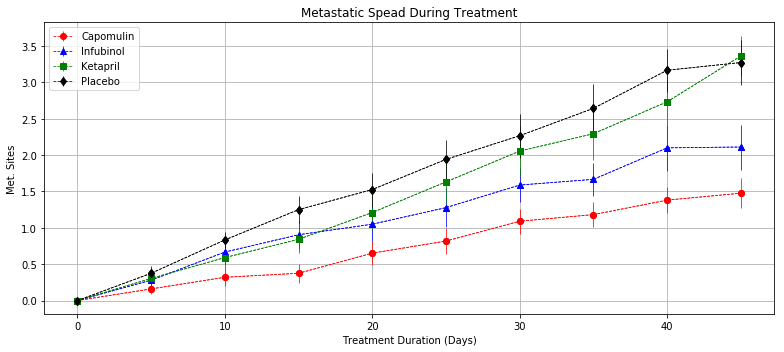

In [11]:
# Set-up the plot and the figure size
fig,ax = plt.subplots(figsize=(11,5))

# Set-up a for-loop with each drug and its specific color and marker 
for drug,c,m in zip(drug_list,color_list,marker_list):
    # Get the mean metastatic site for each drug
    mean = drug_metast_res[drug].tolist()
    # Get the metastatic site's standard error associated with each drug
    list_of_lists = stderr_metast_res.loc[drug].values.tolist()
    std_err = [val for sublist in list_of_lists for val in sublist]
    # Create the stardard error bars and format them accordingly
    ax.errorbar(time, mean,yerr=std_err, color=c,label=drug,marker=m,ls="--",lw=.75)
    # Create the line plot using time as the x-axis and mean as the y-axis
    ax.plot(time, mean, color=c, marker=m,ls="--",lw=.75)
    # Establish the legend and its location on the plot
    ax.legend(loc="upper left", fancybox=True)
    
# Title the plot
ax.set_title("Metastatic Spead During Treatment")
# Label both of the axis accordingly
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
# Add gridlines
ax.grid()

# Use tight_layout to automatically adjust params
plt.tight_layout()
# Save the figure as .png
plt.savefig('met_sites.png')
# Display the figure
plt.show()

## Survival Rates

In [12]:
# Create the GroupBy object based on Drug and Timepoint and take the average of all columns
mouse_count = trial_data.groupby(["Drug","Timepoint"]).count()
# Reset the index
mouse_count.reset_index(inplace = True)
# Remove the Metastatic Sites and Tumour Volume columns
mouse_count = mouse_count.drop(columns = ["Tumor Volume (mm3)","Metastatic Sites"])

# Display the first 5 rows in the dataframe
mouse_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Create a pivot table dataframe for the number of mice at a given time, with Timepoint as rows and Drugs as columns
survival = mouse_count.pivot_table("Mouse ID","Timepoint","Drug")
# Display the first 5 rows in the dataframe
survival.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


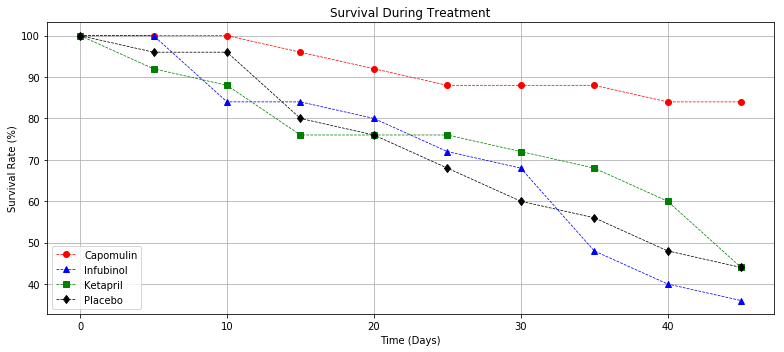

In [14]:
# Set-up the plot and the figure size
fig,ax = plt.subplots(figsize=(11,5))

# Set-up a for-loop with each drug and its specific color and marker 
for drug,c,m in zip(drug_list,color_list,marker_list):
    # Get the survival rate for each drug by taking the number of mice at each time point and dividing it by the initial count
    rate = survival[drug]/survival[drug][0] * 100
    # Put the rates into a list
    surv_percent = rate.tolist()
    # Create the line plot using time as the x-axis and survival percentage as the y-axis
    ax.plot(time, surv_percent, color=c, marker=m,ls="--",lw=.75, label=drug)
    # Establish the legend and its location on the plot
    ax.legend(loc="lower left", fancybox=True)
    
# Title the plot
ax.set_title("Survival During Treatment")
# Label both of the axis accordingly
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
# Add gridlines
ax.grid()

# Use tight_layout to automatically adjust params
plt.tight_layout()
# Save the figure as .png
plt.savefig('survival_rate.png')
# Display the figure
plt.show()

## Summary Bar Graph

In [15]:
# Determine mean percent change by dividing tumor volume at day 45 by tumor volume at day 0, subtract by 1 and multiply by 100
perc_change = (drug_tumor_res.loc[45] / drug_tumor_res.loc[0] - 1) * 100
# Print percent change for all drugs
print(perc_change)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


In [16]:
# Input the percent change into a Pandas dataframe
tumor_size_change = pd.DataFrame(perc_change)
# Rename the column for clarity
tumor_size_change = tumor_size_change.rename(columns = {0:"Percent Change"})
# Add a column to confirm if the tumor volume has decreased over the length of the treatment (i.e. Percent Change < 0)
tumor_size_change["Shrunk Tumor?"] = np.where(tumor_size_change["Percent Change"] <= 0, True, False)

# Select only the four drug treatments that are being investigated
four_treatments = tumor_size_change.loc[drug_list]
# Display the dataframe
four_treatments

,Percent Change,Shrunk Tumor?
Drug,,
Capomulin,-19.475303,True
Infubinol,46.123472,False
Ketapril,57.028795,False
Placebo,51.297960,False


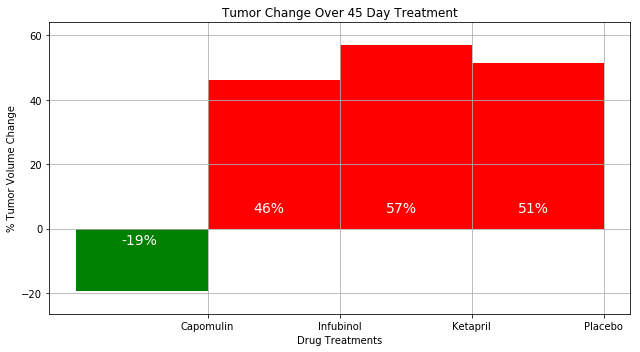

In [17]:
# Set the values in the Percent Change column to a list
perc_change = four_treatments["Percent Change"].values.tolist()
# Set bar color to green if Percent Change is negative, else the bar is red
c = np.where(four_treatments["Percent Change"]<0,"g","r")

# Set-up the plot and the figure size
fig,ax = plt.subplots(figsize=(9,5))
# Create bar plot using the drugs as the x-axis and % tumor volume change as the y-axis
ax.bar(drug_list, perc_change, align="edge",width=-1,color=c)
# Set the bars
bars = ax.patches
# For each bar and percent change...
for bar,chg in zip(bars,perc_change):
    # Set the x_value position to center it
    x_val = bar.get_x() - 0.65
    # Set the y_value position
    y_val = 5
    # If the percent change is negative
    if chg < 0:
        # Multiply y_val by -1 in order for it to display below 0
        y_val *= -1
    # Insert the percent change text with correct formatting    
    ax.text(x_val,y_val,str(int(chg))+"%",ha="left",color="white",fontsize=14)
    
# Title the plot
ax.set_title("Tumor Change Over 45 Day Treatment")
# Label the axis
ax.set_xlabel("Drug Treatments")
ax.set_ylabel("% Tumor Volume Change")
# Set y-limits using the min percent change and max percent change
ax.set_ylim(min(perc_change)-7,max(perc_change)+7)
# Add gridlines
ax.grid()

# Use tight_layout to automatically adjust params
plt.tight_layout()
# Save the figure as .png
plt.savefig('tumor_change.png')
# Display the figure
plt.show()